# Линейная регрессия


Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
X_train.shape

(50, 1)

Добавим intercept

In [ ]:
X_train2 = np.hstack((X_train, np.ones((50,1))))

In [ ]:
X_train2.shape

(50, 2)

Решим уравнение, чтобы узнать w и b

In [ ]:
w_b_1 = np.linalg.solve(X_train2.T @ X_train2, X_train2.T @ y_train)

In [ ]:
w_b_1

array([10.4345452 , -5.80859739])

MSE и MAE

In [ ]:
X_test2 = np.hstack((X_test,np.ones((50,1))))

In [ ]:
# MAE

abs(y_test - X_test2 @ w_b_1).mean()

7.908349907230024

In [ ]:
# MSE

((y_test - X_test2 @ w_b_1)**2).mean()

95.85082826836144

Сравнение с sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

w1 = model.coef_
b1 = model.intercept_

In [ ]:
w1, b1

(array([10.4345452]), -5.808597386091231)

In [ ]:
y_test_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mean_absolute_error(y_test, y_test_predicted)

7.908349907230022

In [ ]:
mean_squared_error(y_test, y_test_predicted)

95.85082826836144

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [ ]:
x_train = data['x_train']
x_train.shape

(250,)

In [ ]:
x_train = x_train.reshape(250,1)
x_train.shape

(250, 1)

In [ ]:
y_train = data['y_train'].reshape(250,1)

In [ ]:
x_train_2 = np.hstack((x_train, np.ones((250,1))))

In [ ]:
w_b_2 = np.linalg.solve(x_train_2.T @ x_train_2, x_train_2.T @ y_train)

In [ ]:
w_b_2

array([[-0.31626637],
       [ 2.03750819]])

In [ ]:
x_test = np.hstack((data['support'].reshape(1000,1), np.ones((1000,1))))

In [ ]:
y_test = np.hstack((data['values'].reshape(1000,1), np.ones((1000,1))))

In [ ]:
y_pred = x_test @ w_b_2

In [ ]:
#MAE

abs(y_test - y_pred).mean()

0.4442208210670683

In [ ]:
#MSE

((y_test - y_pred)**2).mean()

0.26545654983940675

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак


## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

In [ ]:
x_train3 = data['x_train'].reshape(-1,1)
y_train3 = data['y_train'].reshape(-1,1)

In [ ]:
x_test3 = data['support'].reshape(-1,1)
y_test3 = data['values'].reshape(-1,1)

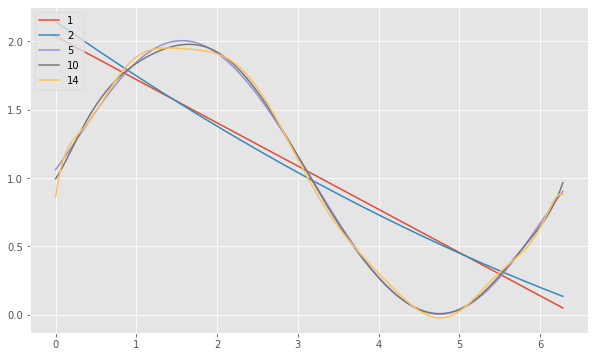

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
degrees = []
maes = []
mses = []
for i in range(1,15):
  poly = PolynomialFeatures(degree = i, include_bias=True)
  x_train_pol = poly.fit_transform(x_train3)
  w_b_3 = np.linalg.solve(x_train_pol.T @ x_train_pol,x_train_pol.T @ y_train3)
  x_test_pol = poly.fit_transform(x_test3)
  y_pred_pol = x_test_pol @ w_b_3
  mae = abs(y_test3 - y_pred_pol).mean()
  mse = ((y_test3 - y_pred_pol)**2).mean()
  degrees.append(i)
  maes.append(mae)
  mses.append(mse)
  if i in [1, 2, 5, 10, 14]:
    plt.plot(x_test3, y_pred_pol, label=i)
    ax.legend(loc='upper left')

In [ ]:
plt.plot(degrees, maes, label='mae')
plt.plot(degrees, mses, label='mse')
plt.legend(loc='upper left')

Из графика видно, что наименьшая ошибка в полиноме степени 5.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [ ]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
model.coef_

array([-0.8417783 ,  0.68132827,  0.01205859,  0.46609576, -2.29396732,
        2.919601  ,  0.07464143, -3.16822959,  2.67018458, -2.08080223,
       -2.16168846,  0.81992018, -3.46106005])

In [ ]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

<BarContainer object of 13 artists>

Из графика видно, что 7 наиболее значимых признаков: RM, LSTAT, DIS, PTRATIO, RAD, TAX, NOX

Сравним качество для полного датасета и датасета из 7 признаков

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
X_train_ = X_train[['RM', 'LSTAT', 'DIS', 'PTRATIO', 'RAD', 'TAX', 'NOX']]
X_test_ = X_test[['RM', 'LSTAT', 'DIS', 'PTRATIO', 'RAD', 'TAX', 'NOX']]

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.fit_transform(X_test_)

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
model = LinearRegression()

model.fit(X_train_, y_train)

y_train_prediction_ = model.predict(X_train_)
y_test_prediction_ = model.predict(X_test_)

Ошибки для полного датасета

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  20.716380740609548
Test MSE:  27.84351857421295
Train MAE:  3.1784245945279026
Test MAE:  3.7160568952049036


Ошибки для датасета из 7 признаков

In [ ]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction_))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction_))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction_))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction_))

Train MSE:  23.87059306515979
Test MSE:  26.64747814651656
Train MAE:  3.375842762283316
Test MAE:  3.730008987077214
